# Data Viz with Python  
Date: 2023-09-26

###Python in Jupyter Notebook and Google Colab
This document can be a Jupyter Notebook or a Google Colab notebook. Both platforms utilize Markdown, a simple formatting syntax for authoring HTML and other types of documents. For more details on using Jupyter Notebook Markdown, see the Jupyter Notebook documentation. Google Colab offers a similar experience with the added benefit of cloud-based execution.

When you run a code cell in Jupyter Notebook or Google Colab, the document will be updated to include both the content and the output of any executed Python code.



#Data visualization with Python

Python offers various libraries to build creative visualizations. Before we dig into more advanced libraries, let's start with creating basic plots using Matplotlib and Seaborn.

Let's first import the libraries:  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Module 1: Basic plots with Matplotlib  
Python has a base visualization library called matplotlib. It is the foundational plotting library in the Python ecosystem and can produce a wide variety of plots and figures. Many other visualization libraries in Python, like seaborn, are built on top of matplotlib.

Here's a brief overview of how to use matplotlib.

#### **Basic plots**

* **Line plot**


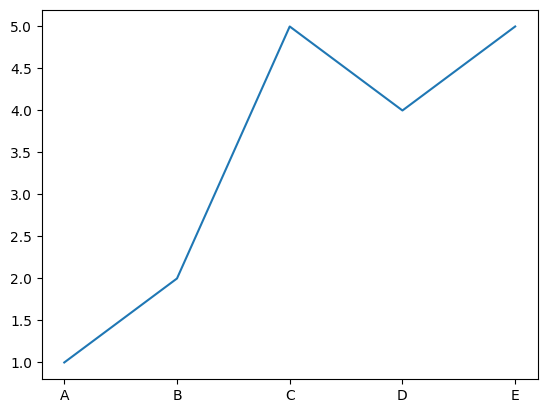

In [2]:
#Q1
a = [1, 2, 5, 4, 5]
b = ["A", "B", "C", "D", "E"]
plt.plot(b, a)###
plt.show()


*   **Scatter plot**


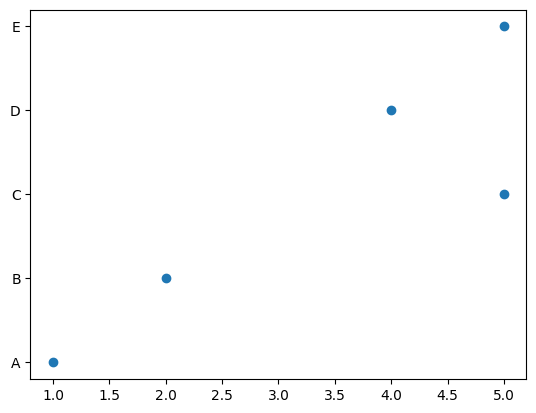

In [3]:
#Q2
plt.scatter(a, b) ###
plt.show()


*   **Bar plot**

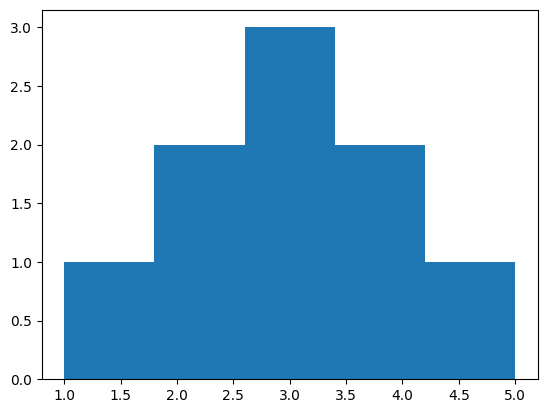

In [4]:
#Q3
data = [1, 2, 2, 3, 3, 3, 4, 4, 5]
plt.hist(data, bins=5) ###
plt.show()


*   **Histogram**

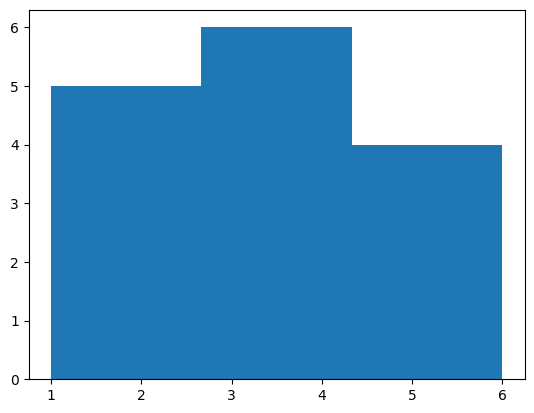

In [5]:
#Q4
data = [1, 2, 5, 3, 6, 3, 3, 4, 5, 2, 2, 2, 3, 5, 3]
plt.hist(data, bins=3) ###
plt.show()


*   **Boxplots**

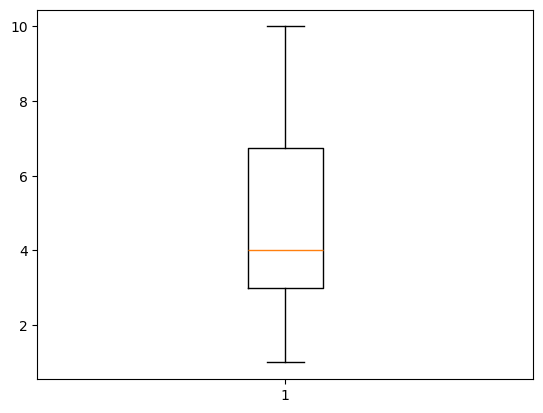

In [6]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 6, 7, 8, 9, 10]
plt.boxplot(data)
plt.show()

##Module 2: Univariate and Bivariate Plots

In [ ]:
from google.colab import files
uploaded = files.upload()

When you run this cell, you'll be prompted to select a file (or multiple files) from your computer to upload. Choose the "social_media_use.csv" file.

OR select another dataset you want to use.

Once the file is uploaded, you can read it into a DataFrame using a library like pandas:

In [ ]:
#Q5
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv('social_media_use.csv') ###



Check the First Few Rows of the DataFrame (optional but useful to verify the data):

In [ ]:
df.head()

##1.1 Univariate visualization

Let's check the overall distribution of social media usage per day. The 'usage_perday' variable indicates usage of social media per day. We will use the **matplotlib** and **seaborn** libraries for visualization.

###Introducing: matplotlib and seaborn
At its core, **matplotlib** is a foundational plotting library in Python. **seaborn** is a higher-level interface to matplotlib that makes creating common visualizations easier and more aesthetically pleasing.

Here's a breakdown of the basic **seaborn** bar plot command:

**Data:** The data that you want to plot. In our case, it's 'df'.
x: The variable in your data to plot on the x-axis.

Here's the basic structure:



In [ ]:
import seaborn as sns

sns.countplot(data=df, x='usage_perday')

Here, we're specifying that the data comes from the dataframe **'df'** and that we want to use the **'usage_perday'** column on the x-axis.

With just the basic structure, you might get a simple plot. To make the plot more informative and aesthetically pleasing, you can add more customizations.

For our data, a bar plot would be appropriate since **'usage_perday'** is a categorical variable.

Below is how you can create a more detailed bar plot. Notice
the color palette **viridis**. It is an accessible color palette. There are other color palettes that meets **accessibility** requirements.

If you want to tryout custom color palette, here is a website that would give you some options: [ColorBrewer.org](https://ColorBrewer.org)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='usage_perday', palette="viridis")
plt.title("Distribution of Daily Social Media Usage")
plt.xlabel("Usage per Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In the code above, **palette="viridis"** is used to specify the color palette (similar to scale_fill_viridis_d() in R's ggplot2). The **plt.xticks(rotation=45)** is used to rotate the x-axis labels for better readability.


Remember, while matplotlib and seaborn provide powerful visualization capabilities, the specific syntax and available functions may differ from R's ggplot2. It's always a good idea to refer to the official documentation or tutorials when working with these libraries.

Notice that there is no order of social media usage per day, making the plot less intuitive.

To order the bars from low to high, we can define the desired order of the categories and ensure our plot respects this order.

Here's how you can adjust the code to order the bars from "Less than an Hour" to "Between 4 and 5 hours":

In [ ]:
usage_order = ["Less than an Hour",
               "Between 1 and 2 hours",
               "Between 2 and 3 hours",
               "Between 3 and 4 hours",
               "Between 4 and 5 hours",
               "More than 5 hours"]

Then, plot the ordered data:

In [ ]:
#Q6
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='usage_perday', order=usage_order, palette="viridis")
plt.title("Distribution of Daily Social Media Usage")
plt.xlabel("Usage per Day") ###
plt.ylabel("Counts") ###
plt.xticks(rotation=45)
plt.show()

This structure provides a clearer representation. However, notice how the order of the color palette may be counterintuitive.

To match the order of the color palette with the order of categories, we can use a reversed color palette.

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='usage_perday', order=usage_order, palette="viridis_r")  # Use the reverse viridis palette
plt.title("Distribution of Daily Social Media Usage")
plt.xlabel("Usage per Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


How about we make it horizontal?

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='usage_perday', order=usage_order, palette="viridis_r")  # Switching to y for horizontal barplot
plt.title("Distribution of Daily Social Media Usage")
plt.ylabel("Usage per Day")
plt.xlabel("Count")
plt.show()


In [ ]:
plt.bar('usage_perday', 'anxiety_level')

## 2.2 Bivariate Visualization
In the following plot, each bar represents an anxiety_level category, and the segments within each bar represent the distribution of usage_perday for that anxiety level. This offers a clear visual representation of how daily social media usage varies across different anxiety levels.

To create a stacked bar plot similar to ggplot's output in Python using **matplotlib**, we need to manually aggregate the data and plot each category one on top of the other. Here's how to do it:

In [ ]:
#Q7
# Group by `anxiety_level` and `usage_perday` and calculate the counts
grouped = df.groupby(['anxiety_level', 'usage_perday']).size().unstack()

# Create a stacked bar plot
plt.figure(figsize=(12, 7))
grouped.plot(kind="bar", stacked=True, colormap="viridis_r", figsize=(12,7))
plt.title("Distribution of Daily Social Media Usage by Anxiety Level")
plt.xlabel("Anxiety Level")
plt.ylabel("Count")
plt.legend(title="Usage per Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() ###


The column order does not seem to make much sense here. Let's manually reorder them.

In [ ]:
#Q8
import matplotlib.pyplot as plt

# Assuming `grouped` is your DataFrame that has been grouped and has columns for different usage durations

# Define the new order for the columns so that "Less than an Hour" is last
column_order = ["More than 5 hours", "Between 4 and 5 hours", "Between 3 and 4 hours",
                "Between 2 and 3 hours", "Between 1 and 2 hours", "Less than an Hour"]

# Reorder the DataFrame columns based on the new order
grouped = grouped.reindex(columns=column_order)

# Create the stacked bar plot
plt.figure(figsize=(12, 7))
grouped.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12,7))
plt.title("Distribution of Daily Social Media Usage by Anxiety Level", fontsize=20)
plt.xlabel("Anxiety Level", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)

# Get the handles and labels for the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Reverse the order to get the "Less than an Hour" at the top of the legend
handles = handles[::-1]
labels = labels[::-1]

# Add the legend with the reversed handles/labels
plt.legend(handles, labels, title="Usage per Day", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()



Now, let's try a line graph by aggregating the data by mean **'anxiety_level'** for each **'usage_perday'**category. This will help us observe if there's a noticeable trend between these two variables. Note: This visualization alone will not inform us of any statistically significant relationship between these two variables. For that, a more rigorous statistical analysis would be necessary.



In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(df['usage_perday'], df['anxiety_level'], marker="o")

plt.title("Trend of Anxiety Level by Usage per Day")
plt.xlabel("Usage per Day")
plt.ylabel("Anxiety Level")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Let's try Seaborn instead of Matplotlib.
But first, make sure the variables are in the correct format:

In [ ]:
df['anxiety_level'] = df['anxiety_level'].astype(float)
df['usage_perday'] = pd.Categorical(df['usage_perday'], categories=usage_order, ordered=True)


In [ ]:
df.head()


In [ ]:
#Q9
import seaborn as sns
import matplotlib.pyplot as plt

# Your mapping dictionary
usage_mapping = {
    "Less than an Hour": "<1 hr",
    "Between 1 and 2 hours": "1-2 hrs",
    "Between 2 and 3 hours": "2-3 hrs",
    "Between 3 and 4 hours": "3-4 hrs",
    "Between 4 and 5 hours": "4-5 hrs",
    "More than 5 hours": ">5 hrs"
}

# Create a new column 'usage_perday_short' for the shortened names
df['usage_perday_short'] = df['usage_perday'].map(usage_mapping)

# Check for any NaN values and handle them if necessary
# For example, you can drop the NaN values or investigate why they occurred
# df = df.dropna(subset=['usage_perday_short'])

# Now, plot the lineplot with the renamed categories in 'usage_perday_short'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='usage_perday_short', y='anxiety_level', marker="o")
plt.title("Trend of Anxiety Level by Level of Social Media Usage", fontsize=20)
plt.xlabel("Social media usage per day", fontsize=16)
plt.ylabel("Anxiety level", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Now, plot the lineplot with the renamed categories
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='usage_perday_short', y='anxiety_level', marker="o")
plt.title("Trend of Anxiety Level by Usage per Day", fontsize=20)
plt.xlabel("Usage per Day", fontsize=16)
plt.ylabel("Anxiety Level", fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Alternately, you can aggregate data as you want following the steps here:

In [ ]:
agg_data = df.groupby('usage_perday').agg(mean_anxiety=('anxiety_level', 'mean')).reset_index()


Create the line graph:

In [ ]:
#Q10
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_data, x='usage_perday', y='mean_anxiety', marker="o")
plt.title("Trend of Anxiety Level by Usage per Day")
plt.xlabel("Usage per Day")
plt.ylabel("Mean Anxiety Level")
plt.xticks(rotation=45) ###
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Feel free to explore other variables in the dataset to uncover any interesting trends!

Thank you!